# Stock Market Analysis and Prediction

Data from Yahoo Finance

In [114]:
#For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [115]:
# For reading stock data from yahoo
import pandas_datareader as pdr
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

## Importing Data for Selected Companies

In [116]:
import yfinance as yf
from datetime import datetime

tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META', 'TSLA']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start=start, end=end, progress=False)

Note: Using globals() is a quick way of setting the DataFrame names but it can be sloppy. Yet it will allow us to look at our data. 

Going into Apple to get explore the data

Looking at the data table to get a better grasp

In [117]:
AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-17  141.070007  142.899994  140.270004  142.410004  141.570160   
2022-10-18  145.490005  146.699997  140.610001  143.750000  142.902252   
2022-10-19  141.690002  144.949997  141.500000  143.860001  143.011597   
2022-10-20  143.020004  145.889999  142.649994  143.389999  142.544388   
2022-10-21  142.869995  147.850006  142.649994  147.270004  146.401505   

              Volume  
Date                  
2022-10-17  85250900  
2022-10-18  99136600  
2022-10-19  61758300  
2022-10-20  64522000  
2022-10-21  86548600

## Summary Statistics

In [118]:
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   163.238881  164.965760  161.723480  163.430680  163.052648   
std     18.896464   18.689423   19.114018   18.869796   19.047515   
min    126.010002  127.769997  124.169998  125.019997  124.488876   
25%    147.864998  149.954998  146.264996  148.049999  147.489712   
50%    164.945000  166.299995  163.959999  165.279999  164.829117   
75%    178.312504  180.052498  177.110004  178.340000  178.337498   
max    196.240005  198.229996  195.279999  196.449997  196.185074   

             Volume  
count  2.500000e+02  
mean   6.552043e+07  
std    2.134965e+07  
min    3.145820e+07  
25%    5.052690e+07  
50%    6.077235e+07  
75%    7.489575e+07  
max    1.647624e+08

## General Information

In [119]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-17 to 2023-10-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


## Doing a quick deep dive into one company (APPL)

Text(0.5, 1.0, 'Daily Closing Price of APPL Stock From November 2022 to October 2023')

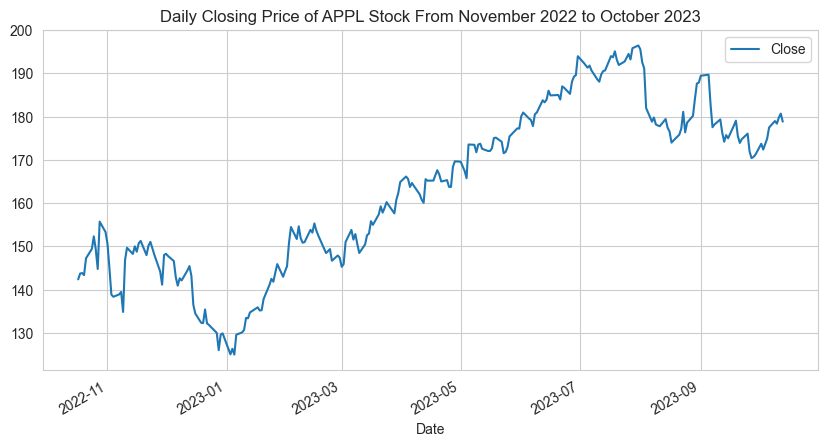

In [120]:
AAPL['Close'].plot(legend=True, figsize=(10,5))
plt.title("Daily Closing Price of APPL Stock From November 2022 to October 2023")

Analysis: 
There appears to be a steady increase of daily closing price starting around March 2023 till a peak in August 2023. From there we see a trend of decreasing closing price yet the current closing price (October 2023) is much higher than the starting closing price seen in November 2022. 

Text(0.5, 1.0, 'Daily APPL Stock Volume From November 2022 to October 2023')

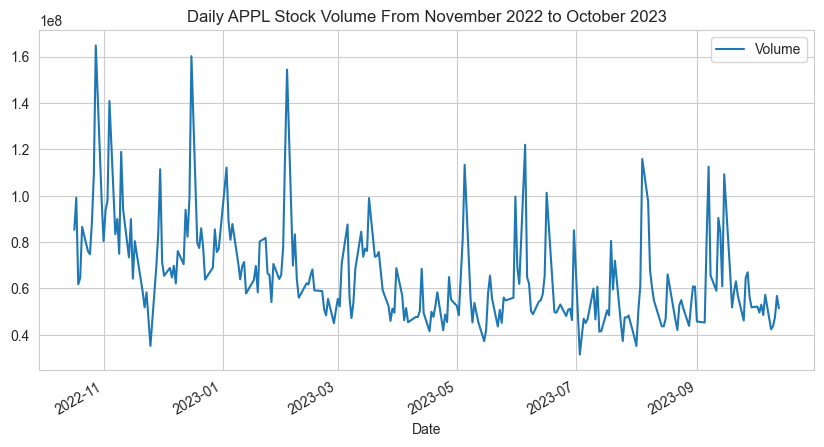

In [121]:
AAPL['Volume'].plot(legend=True, figsize=(10,5))
plt.title("Daily APPL Stock Volume From November 2022 to October 2023")

Analysis: 
We can see that in November and December of 2022 the volume of Apple stock was being traded was higher than the rest. Additionally, we can see that it's overall trend currently declining and the volume is much lower than compared to a year ago.  

### Plotting the moving average for Apple

In [122]:
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = AAPL['Close'].rolling(ma).mean()

Text(0.5, 1.0, 'Moving Average for APPL Stock Over Different Time Spans')

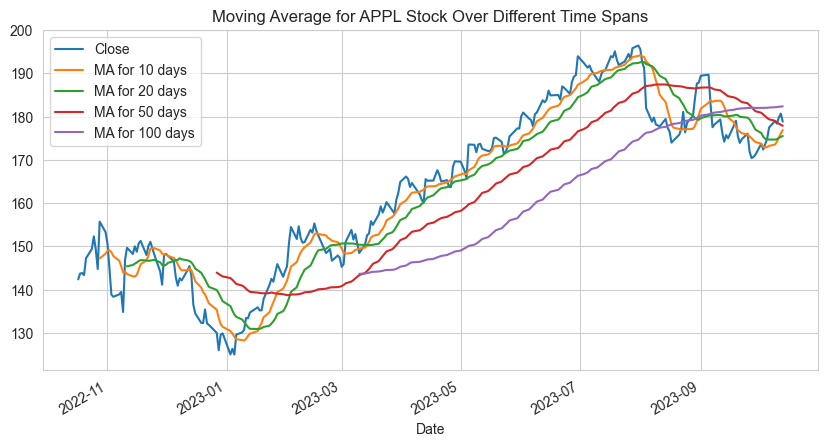

In [123]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,5))
plt.title("Moving Average for APPL Stock Over Different Time Spans")

### Daily Return Analysis for APPL Stock

Text(0.5, 1.0, 'Daily APPL Returns From October 2022 to October 2023')

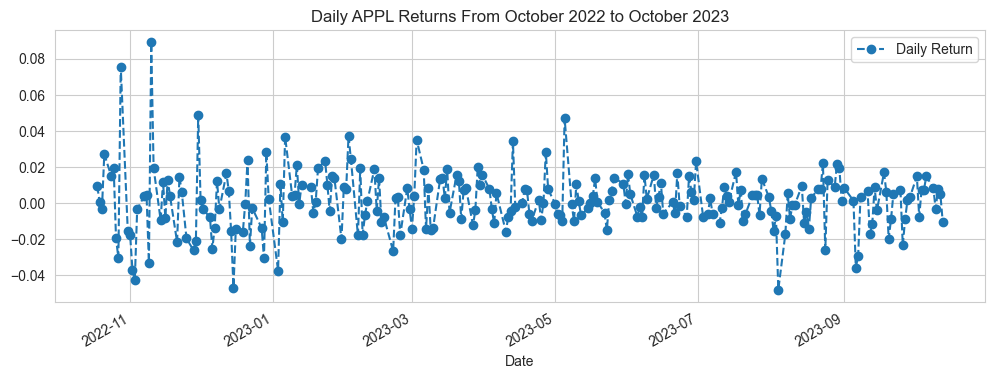

In [124]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Lets plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')
plt.title("Daily APPL Returns From October 2022 to October 2023")

Plotting an average daily return with a histogram and then putting a kde plot on the same figure. 

Historgram first...

Text(0, 0.5, 'Count')

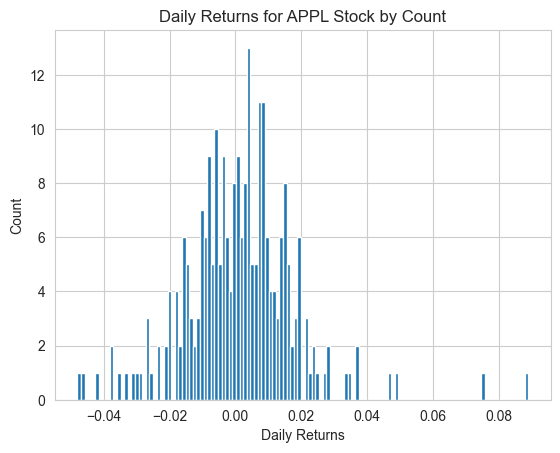

In [125]:
AAPL['Daily Return'].hist(bins=125)
plt.title("Daily Returns for APPL Stock by Count")
plt.xlabel("Daily Returns")
plt.ylabel("Count")

Dropping the NaN values because seaborn can't read it.

/var/folders/1b/p1vnpxpx7v1b42147dnjlxb40000gn/T/ipykernel_56405/1938332374.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='green')


Text(0, 0.5, 'Probability Density')

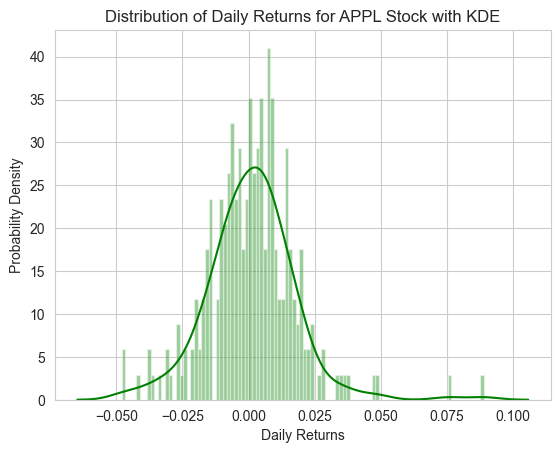

In [126]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='green')
plt.title("Distribution of Daily Returns for APPL Stock with KDE")
plt.xlabel("Daily Returns")
plt.ylabel("Probability Density")

# Analysis for Multiple Companies

Building a dataframe with all the ['Close'] columns for each of the stocks dataframe to analyze the returns of all stocks in list.

Grab all the closing prices for the tech stock list into one DataFrame


In [127]:
closingprice_df = pd.DataFrame()

for stock in tech_list: 
    stock_data = yf.download(stock, start=start, end=end, progress=False)
    closingprice_df[stock] = stock_data['Close']

In [128]:
closingprice_df.head()

AAPL       GOOGL        MSFT        AMZN        META  \
Date                                                                     
2022-10-17  142.410004   99.970001  237.529999  113.790001  134.039993   
2022-10-18  143.750000  100.769997  238.500000  116.360001  132.800003   
2022-10-19  143.860001   99.629997  236.479996  115.070000  133.229996   
2022-10-20  143.389999   99.970001  236.149994  115.250000  131.529999   
2022-10-21  147.270004  101.129997  242.119995  119.320000  130.009995   

                  TSLA  
Date                    
2022-10-17  219.350006  
2022-10-18  220.190002  
2022-10-19  222.039993  
2022-10-20  207.279999  
2022-10-21  214.440002

Getting the daily return for all the stocks since we now have all the closing prices. 

In [129]:
# Make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [130]:
tech_returns.head()

AAPL     GOOGL      MSFT      AMZN      META      TSLA
Date                                                                  
2022-10-17       NaN       NaN       NaN       NaN       NaN       NaN
2022-10-18  0.009409  0.008002  0.004084  0.022585 -0.009251  0.003829
2022-10-19  0.000765 -0.011313 -0.008470 -0.011086  0.003238  0.008402
2022-10-20 -0.003267  0.003413 -0.001395  0.001564 -0.012760 -0.066474
2022-10-21  0.027059  0.011603  0.025281  0.035315 -0.011556  0.034543

We can compare the daily percentage return of two stocks to see if there are any correlations. To begin, we'll compare Google (GOOGL - Alphabet Inc) stock to itself. We should see a perfect linear relationship. 

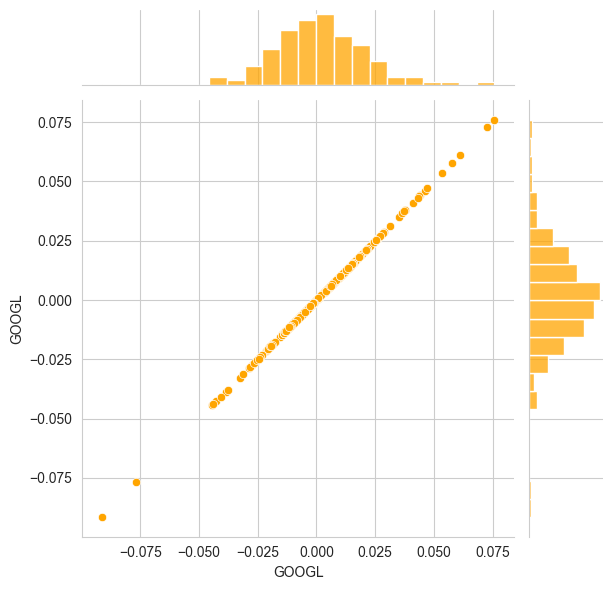

In [131]:
sns.jointplot(x='GOOGL', y='GOOGL', data=tech_returns, kind='scatter', color='orange')
plt.show()

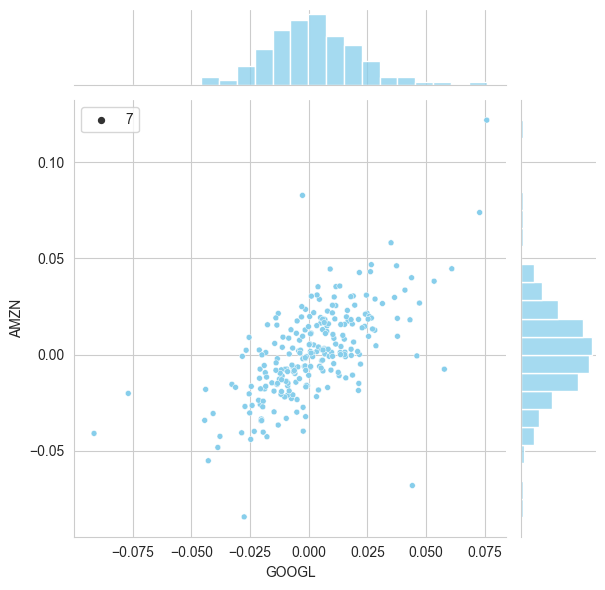

In [132]:
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='scatter', size=7, color='skyblue')


Or we can look at it in a bit more of an 'intuitive' way by applying a hex plot. The darker the color the more overlay between the two companies we see. 

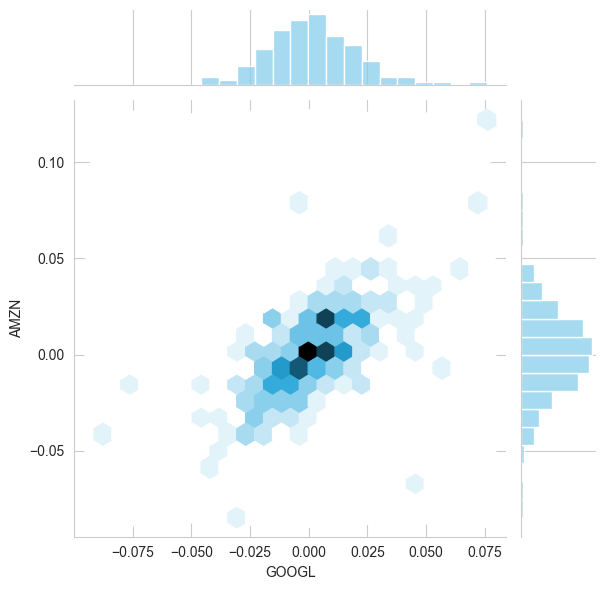

In [133]:
sns.jointplot(x='GOOGL', y='AMZN', data=tech_returns, kind='hex', color='skyblue')

Comparing Apple and Meta

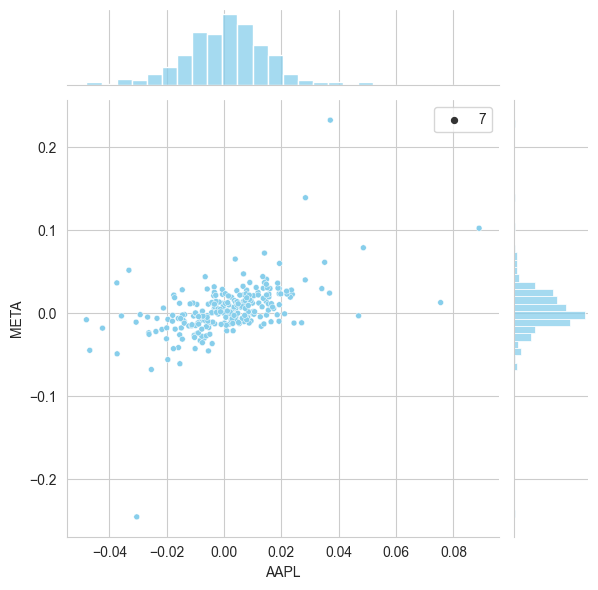

In [134]:
sns.jointplot(x='AAPL', y='META', data=tech_returns, kind='scatter', size=7, color='skyblue')


We can repeat this comparison analysis for every possible combination of stocks within the tech_list. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


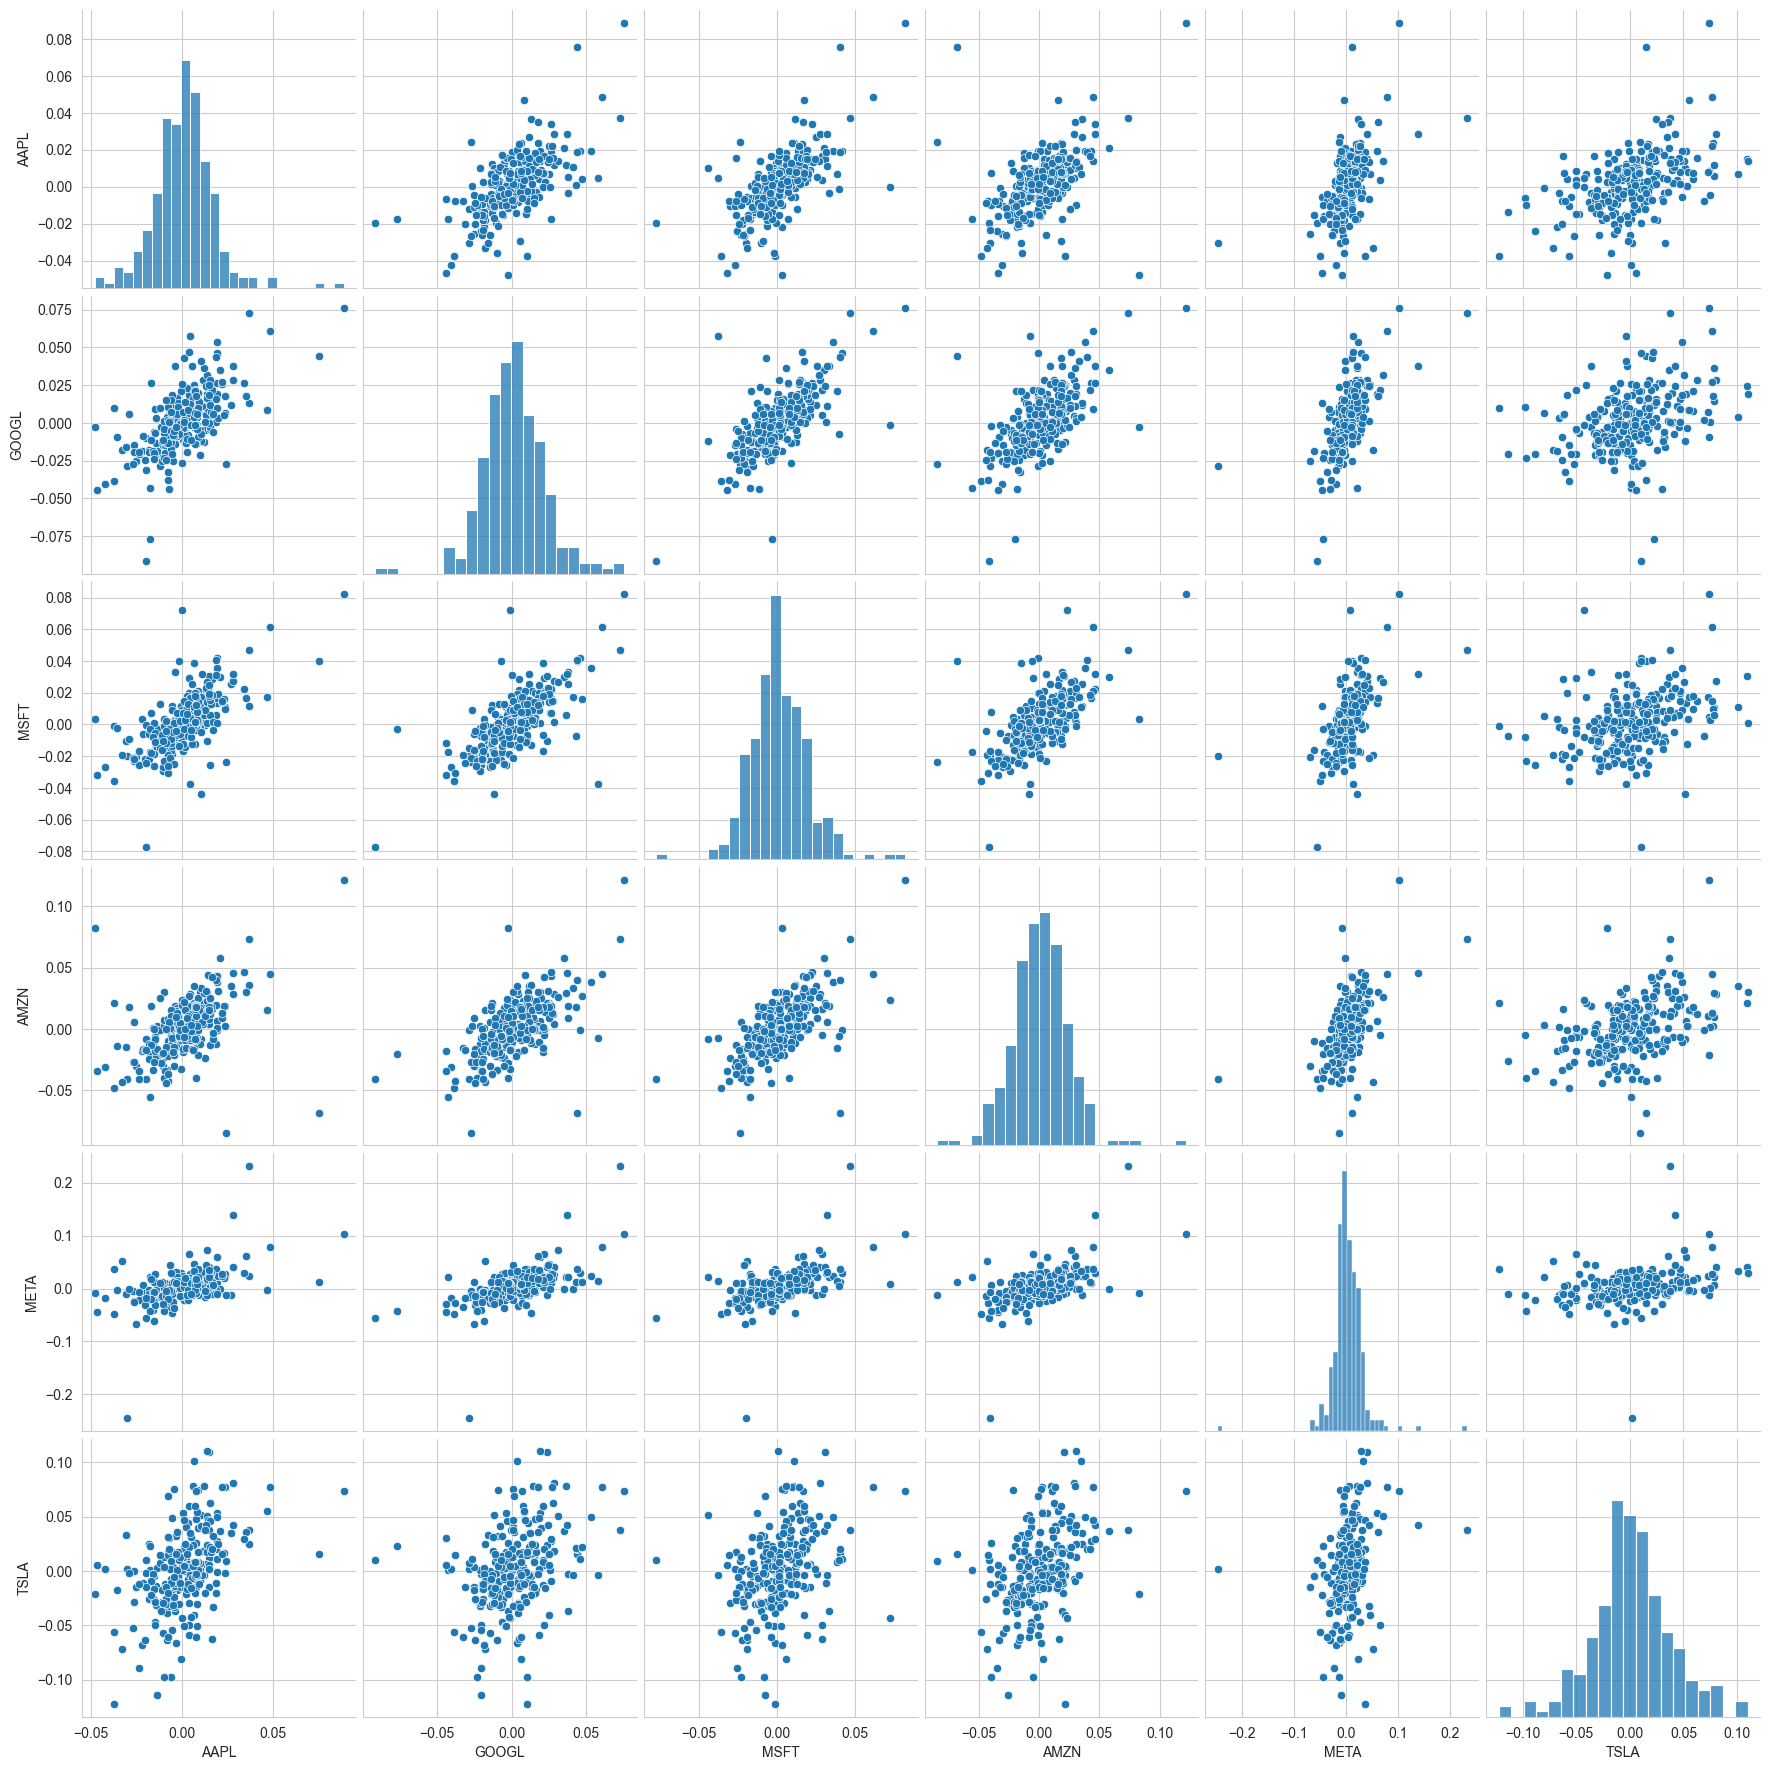

In [135]:
sns.pairplot(tech_returns.dropna(),size=3)

Furthermore, we can sns.PairGrid() to do a few things. 
1. It helps customize the visualization of the data if the scatter plots are difficult to read. 
2. It can help create more complex visualizations such as KDE (Kernel Density Estimation) plots. 
3. sns.PairGrid() can be more efficient as it generates the grid and then maps the points. 

Looking at daily tech returns. 

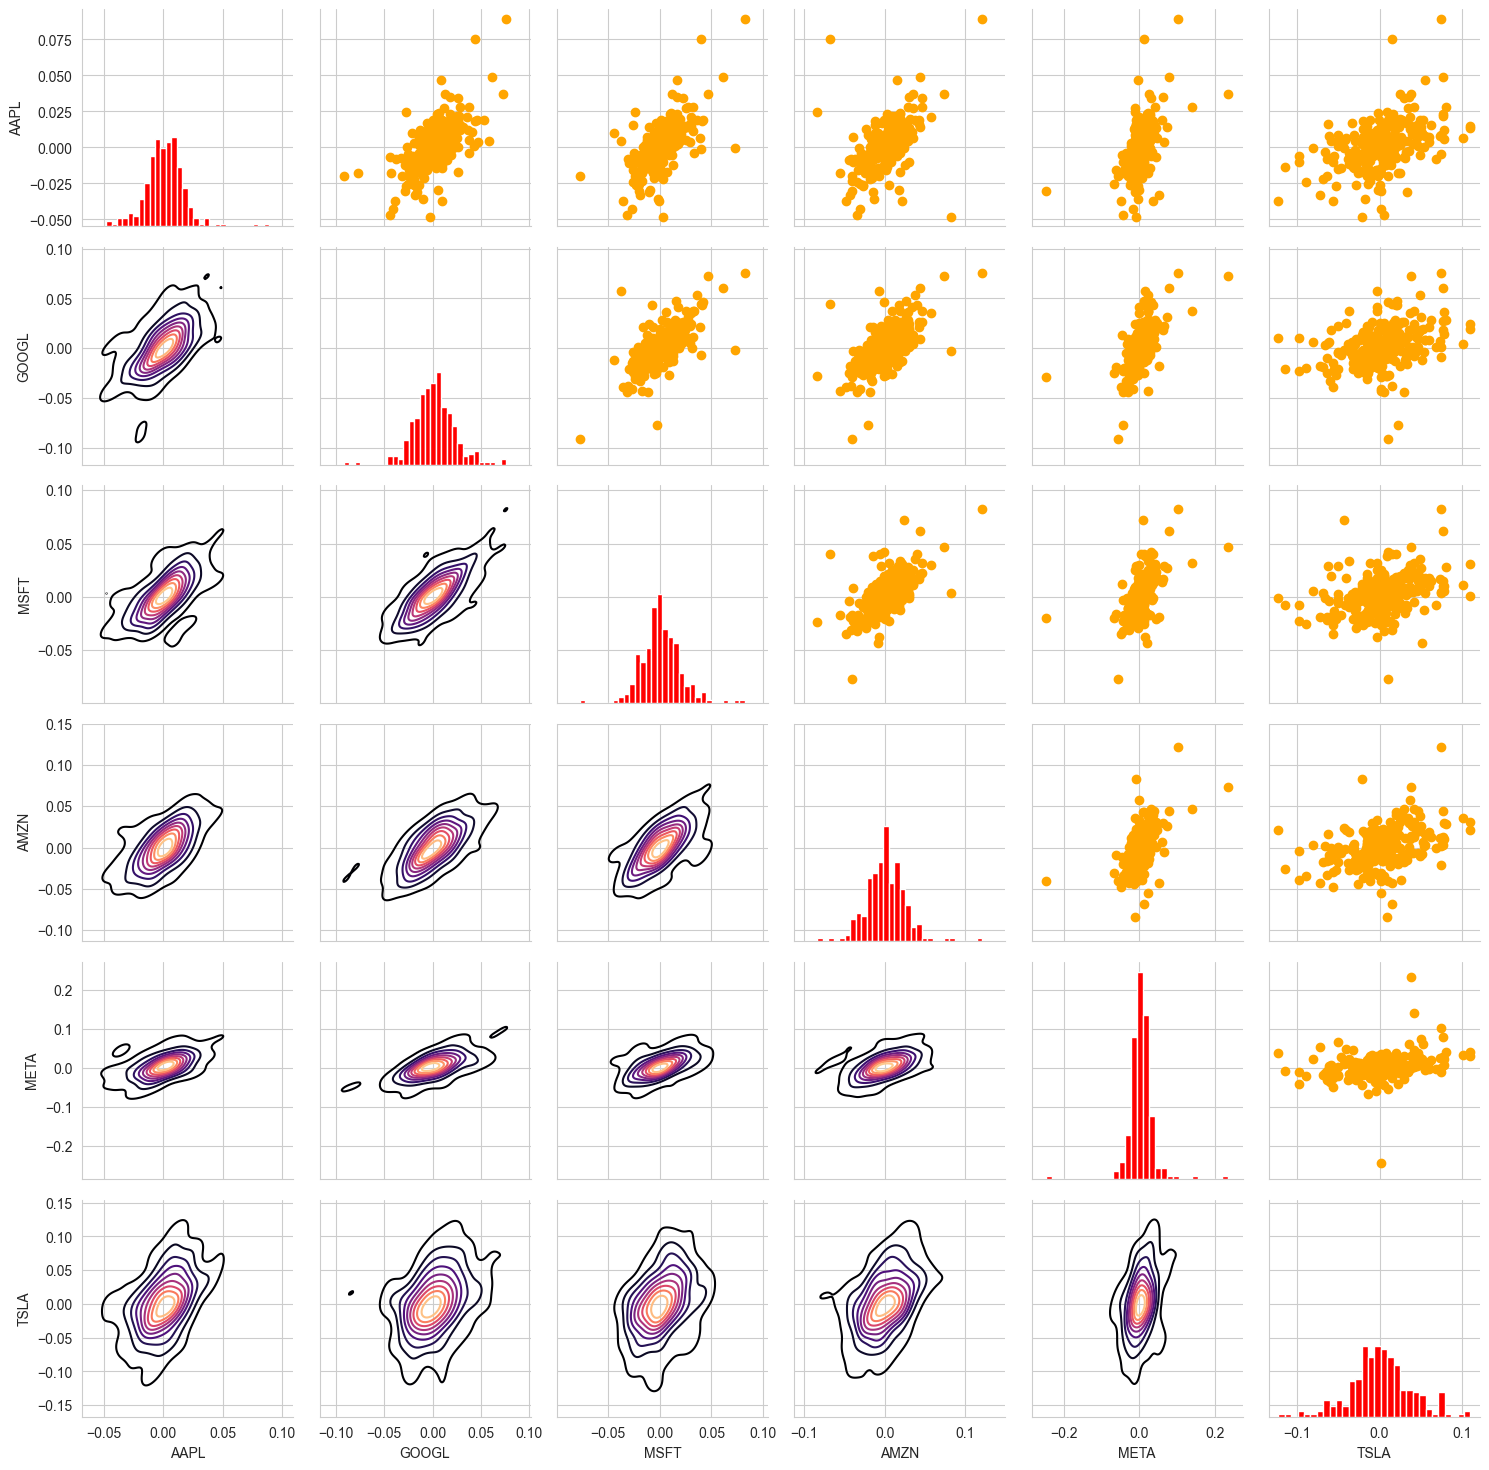

In [136]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='orange')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map 
returns_fig.map_lower(sns.kdeplot,cmap='magma')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30, color='red')

Looking at daily returns of closing prices. 

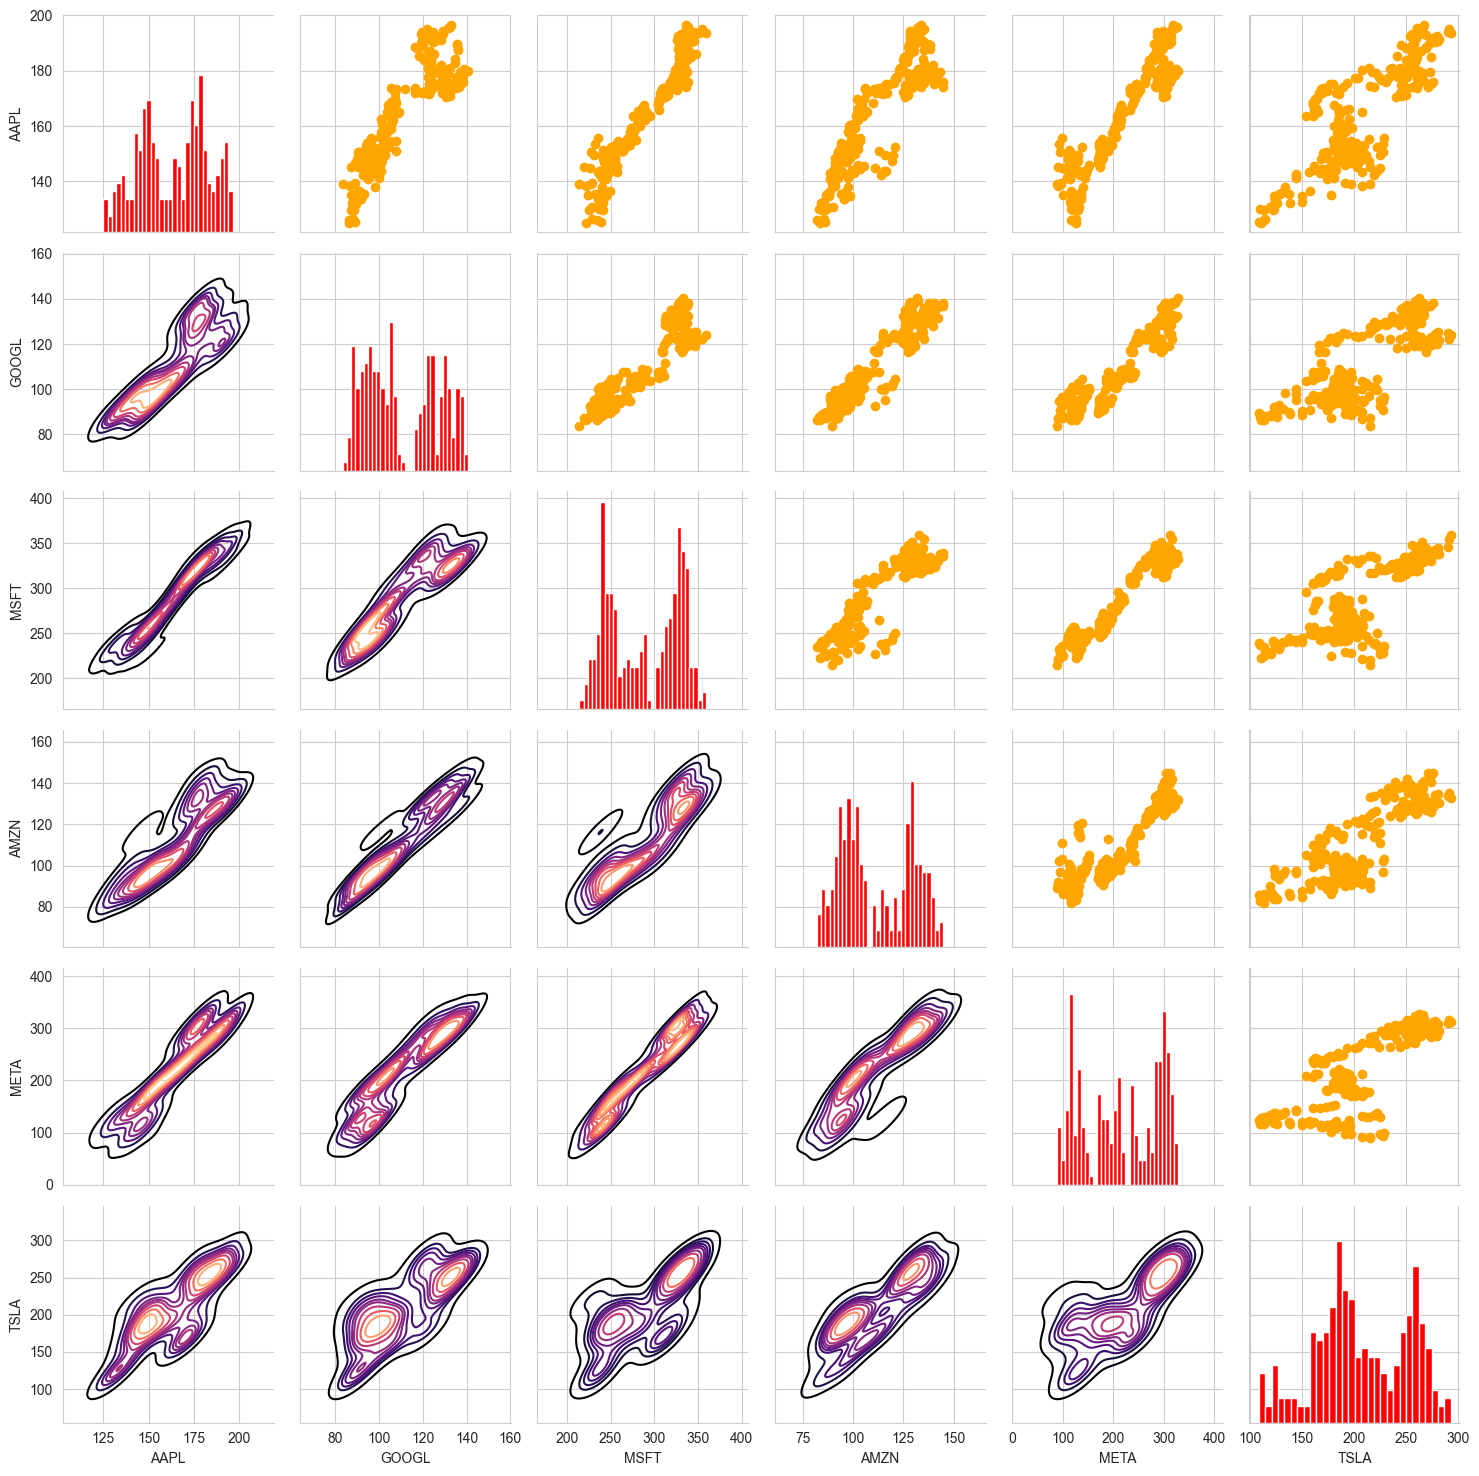

In [137]:

# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='orange')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map
returns_fig.map_lower(sns.kdeplot,cmap='magma')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30, color='red')
     

Using seaborn to create two heatmaps side by side to quickly look at the correlation for daily return of stocks and then daily return of closing prices. 


Text(0.5, 1.0, 'Correlation of Daily Stock Closing Price')

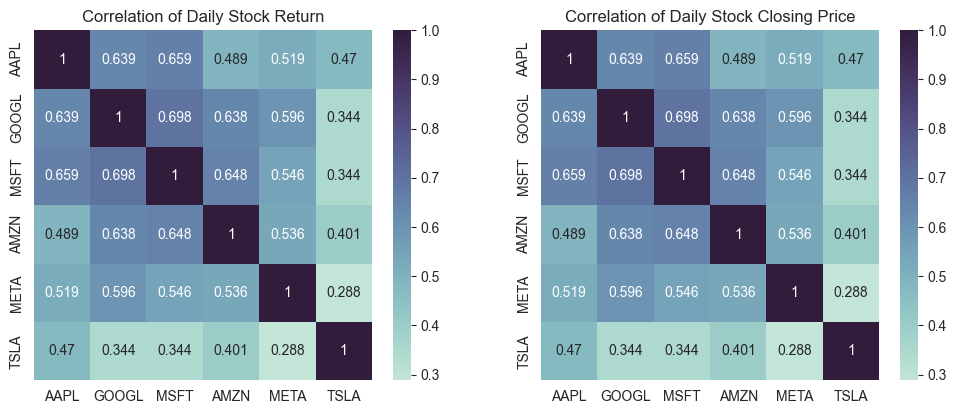

In [138]:
# Setting plot size
plt.figure(figsize=(12,10))

# Defining the color palette using sns.color_palette()
my_cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

# Plot correlation of stock return 
plt.subplot(2, 2, 1)
sns.heatmap(tech_returns.corr(), annot=True, fmt=".3g", cmap=my_cmap)
plt.title('Correlation of Daily Stock Return')

# Plot correlation of stock closing price
plt.subplot(2, 2, 2)
sns.heatmap(tech_returns.corr(), annot=True, fmt=".3g", cmap=my_cmap)
plt.title('Correlation of Daily Stock Closing Price')

From these heatmaps we can see that none of the companies had a very strong correlation with each other. Although, we do see that Microsoft and Google had the highest correlation in both correlation of daily stock return and daily stock closing price. The two companies that had the lowest correlation (0.288) was between Meta and Tesla. One last thing to note, is that we see no negative values here meaning that all these companies were positively correlated in this data. 

# Risk Analysis

Start by defining a new dataframe as a cleaned version of the original tech_returns dataframe

In [139]:
rets = tech_returns.dropna()

We can look at how much value we put at risk by investing in a specific stock by using the information on daily percentage returns and compare the expected return with the standard deviation of the daily returns. 

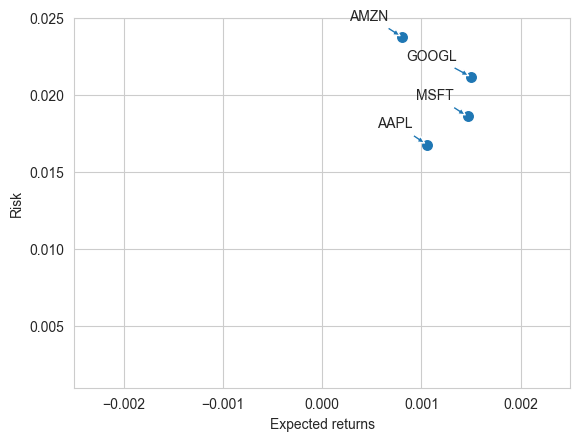

In [140]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*15

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot 
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plot
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'simple', connectionstyle = 'arc3,rad=-0.01'))

# Value at Risk

## Apple

In [141]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["AAPL"].quantile(0.05)

-0.02585025942774837

This means that approximately 5% of the trading days, the daily return for the observed APPL stock will be lower than -0.03. In other words the VaR (Value at Risk) is -0.03. 

> 
Lets take an example: 
- 1 million dollar investment in APPL stocks

- 0.05 empirical quantile for APPL stocks gives us -0.03

- -0.03*1,000,000 = $-30,000

- Potential loss for 5% of the trading days with a 1 million dollar investment is $30,000. 

>


## Amazon

In [142]:
# For AMZN stocks
rets["AMZN"].quantile(0.05)

-0.03570564752008902

VaR = -0.04

## Google

In [143]:
# For GOOGL stocks
rets["GOOGL"].quantile(0.05)

-0.02733731965812507

VaR = -0.03

## Microsoft

In [144]:
# For MSFT stocks
rets["MSFT"].quantile(0.05)

-0.025332020175388003

VaR = -0.03

## Meta

In [145]:
# For Meta stocks
rets["META"].quantile(0.05)

-0.032234779440126336

VaR = -0.04

## Tesla

In [146]:
# For TSLA stocks
rets["TSLA"].quantile(0.05)

-0.06094112321259881

VaR = -0.06

# Value Risk Using the Monte Carlo Method

The Monte Carlo method is a common method to predict behavior or properties of a system when there is uncertainty. It begins by using generated random points within the region of interest and calculating the function values at those points. The function values are then averaged and then multiplied by the area of the reion of interest, giving an estimate of the integral. Therefore, the larger number of samples (N) we have, the more points we can use, and the more accurate the estimate becomes. 

Here is the Monte Carlo equation: 

I = (A / N) * Σf(x_i)

Where: 
>
- I: Estimated Value of Integral
- A: Area of Region of Interest
- N: Number of random samples (simulations)
- Σf(x_i): Function being evaluated at the randomly chosen points x_i
>


To understand the basics, we'll use Google as an example. 

In [147]:
rets.head()

AAPL     GOOGL      MSFT      AMZN      META      TSLA
Date                                                                  
2022-10-18  0.009409  0.008002  0.004084  0.022585 -0.009251  0.003829
2022-10-19  0.000765 -0.011313 -0.008470 -0.011086  0.003238  0.008402
2022-10-20 -0.003267  0.003413 -0.001395  0.001564 -0.012760 -0.066474
2022-10-21  0.027059  0.011603  0.025281  0.035315 -0.011556  0.034543
2022-10-24  0.014803  0.013745  0.021188  0.004190 -0.002231 -0.014876

In [148]:
# Setting up our Time Horizon
days = 365

# Delta
dt = 1/days

# Grabbing our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['GOOGL']

# Grabing the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['GOOGL']

This function below will take in the starting price and number of days, then use the sigma and mu (previously found) from the daily returns. Additionally, the terms of shock and drift are used. Shock helps represent the randomness and unpredictableness in the price; Drift represents the expected movement in price over time (expected return of asset (mu) * time step (dt)). 

In [149]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Putting the function into action to see for each of the companies listed in the tech_list. 

## Note On Graphs Below: 
- Each analysis will be run 100 times 
- Plots show potential range of prices that the companies stock could follow

## Google

In [150]:
# For Google Stock - GOOGL
GOOGL.head()

Open        High        Low       Close   Adj Close  \
Date                                                                    
2022-10-17   98.860001  100.930000  98.830002   99.970001   99.970001   
2022-10-18  103.129997  103.470001  99.970001  100.769997  100.769997   
2022-10-19  100.010002  101.019997  98.919998   99.629997   99.629997   
2022-10-20  100.000000  102.320000  99.389999   99.970001   99.970001   
2022-10-21   97.849998  101.309998  97.720001  101.129997  101.129997   

              Volume  
Date                  
2022-10-17  28419200  
2022-10-18  24060700  
2022-10-19  23811100  
2022-10-20  25323200  
2022-10-21  32458700

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

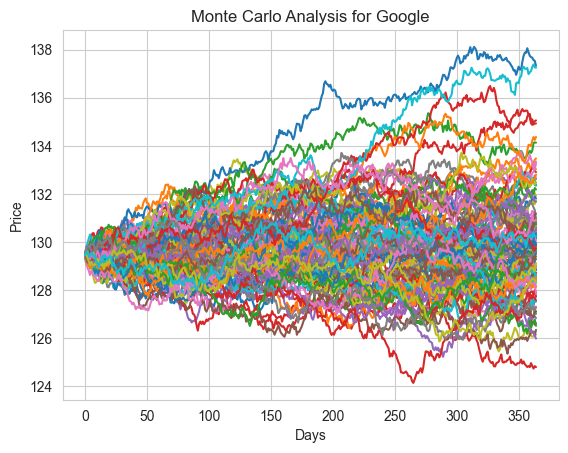

In [151]:
start_price = 129.44

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')
     

## Amazon 

In [152]:
# For Amazon Stock - AMZN
AMZN.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-17  110.110001  114.190002  110.089996  113.790001  113.790001   
2022-10-18  119.059998  119.519997  114.790001  116.360001  116.360001   
2022-10-19  114.709999  116.589996  113.220001  115.070000  115.070000   
2022-10-20  113.830002  118.239998  113.510002  115.250000  115.250000   
2022-10-21  114.790001  119.589996  114.500000  119.320000  119.320000   

              Volume  
Date                  
2022-10-17  62782000  
2022-10-18  65607400  
2022-10-19  47198100  
2022-10-20  48795100  
2022-10-21  55660500

Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

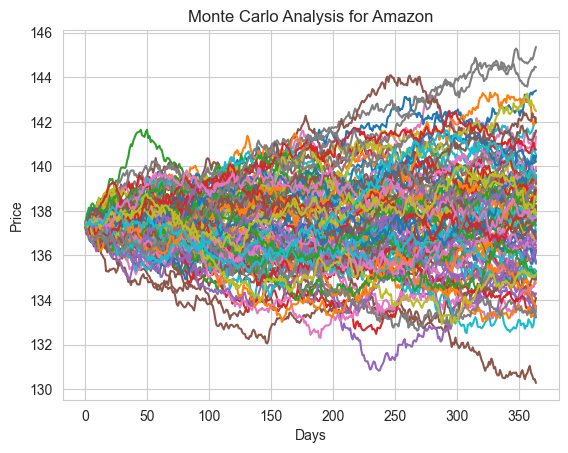

In [153]:
start_price = 137.38

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Amazon')

## Apple

In [154]:
# For Apple Stock - AAPL
AAPL.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-17  141.070007  142.899994  140.270004  142.410004  141.570160   
2022-10-18  145.490005  146.699997  140.610001  143.750000  142.902252   
2022-10-19  141.690002  144.949997  141.500000  143.860001  143.011597   
2022-10-20  143.020004  145.889999  142.649994  143.389999  142.544388   
2022-10-21  142.869995  147.850006  142.649994  147.270004  146.401505   

              Volume  MA for 10 days  MA for 20 days  MA for 50 days  \
Date                                                                   
2022-10-17  85250900             NaN             NaN             NaN   
2022-10-18  99136600             NaN             NaN             NaN   
2022-10-19  61758300             NaN             NaN             NaN   
2022-10-20  64522000             NaN             NaN             NaN   
2022-10-21  86548600             NaN             NaN             NaN   

            MA for 100 days  Daily Return  
Date                                       
2022-10-17              NaN           NaN  
2022-10-18              NaN      0.009409  
2022-10-19              NaN      0.000765  
2022-10-20              NaN     -0.003267  
2022-10-21              NaN      0.027059

Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

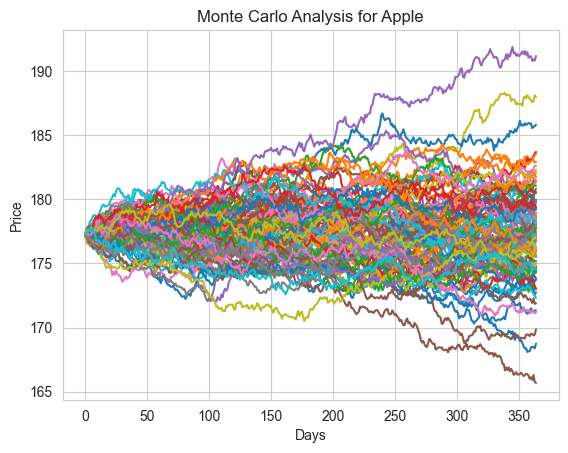

In [155]:
start_price = 177.24

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Apple')

## Microsoft 

In [156]:
# For Microsoft Stock - MSFT
MSFT.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-17  235.820007  238.960007  235.139999  237.529999  235.257217   
2022-10-18  243.240005  243.929993  235.369995  238.500000  236.217957   
2022-10-19  237.039993  239.610001  234.289993  236.479996  234.217270   
2022-10-20  235.770004  241.309998  234.869995  236.149994  233.890427   
2022-10-21  234.740005  243.000000  234.500000  242.119995  239.803314   

              Volume  
Date                  
2022-10-17  28142300  
2022-10-18  26329600  
2022-10-19  19985700  
2022-10-20  21811000  
2022-10-21  26299700

Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

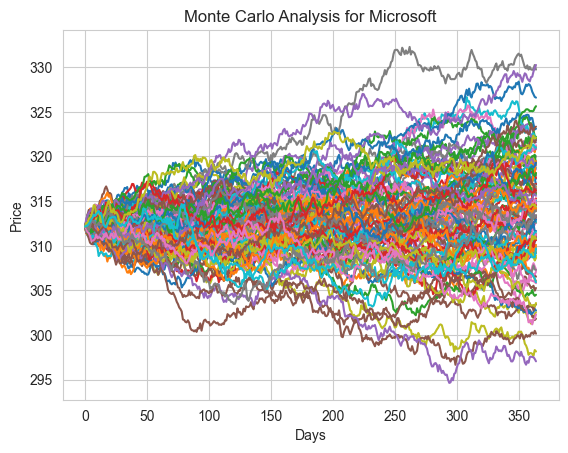

In [157]:
start_price = 312.14

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Microsoft')

## Tesla 

In [158]:
# For Telsa - TSLA
TSLA.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-17  210.039993  221.860001  209.449997  219.350006  219.350006   
2022-10-18  229.500000  229.820007  217.250000  220.190002  220.190002   
2022-10-19  219.800003  222.929993  217.779999  222.039993  222.039993   
2022-10-20  208.279999  215.550003  202.000000  207.279999  207.279999   
2022-10-21  206.419998  214.660004  203.800003  214.440002  214.440002   

               Volume  
Date                   
2022-10-17   79428800  
2022-10-18   75891900  
2022-10-19   66571500  
2022-10-20  117798100  
2022-10-21   75713800

Text(0.5, 1.0, 'Monte Carlo Analysis for Tesla')

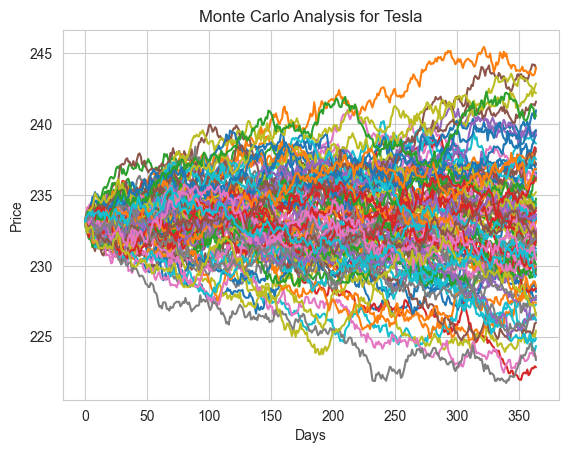

In [159]:
start_price = 233.09

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Tesla')

## Meta

In [160]:
# For Meta - META
META.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-10-17  130.300003  134.789993  130.179993  134.039993  134.039993   
2022-10-18  137.089996  137.839996  131.399994  132.800003  132.800003   
2022-10-19  132.889999  137.000000  132.220001  133.229996  133.229996   
2022-10-20  132.929993  136.770004  131.309998  131.529999  131.529999   
2022-10-21  126.309998  130.119995  125.440002  130.009995  130.009995   

              Volume  
Date                  
2022-10-17  29612200  
2022-10-18  25445000  
2022-10-19  30691000  
2022-10-20  26356300  
2022-10-21  46348600

Text(0.5, 1.0, 'Monte Carlo Analysis for Meta')

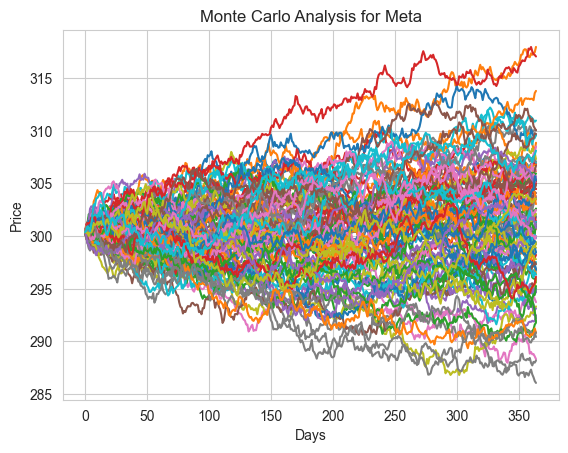

In [161]:
start_price = 300.38

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Meta')

## Creating a historgram of the end results for a larger run size

Note: 
- Each analysis now will be run 10,000 times
- Still using a Monte Carlo Simulation

In [162]:
#Let's start with Google stock price
start_price = 129.44

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Plotting a histogram and using quantiles to define the risk 

Text(0.5, 1.0, 'Final Price Distribution for Google Stock (GOOGL) after 365 days')

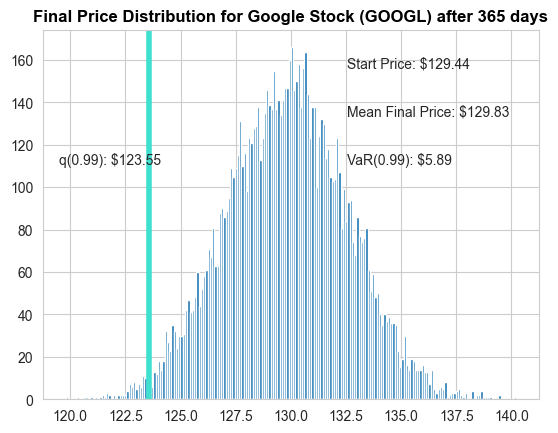

In [163]:
# Define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='Turquoise')

# For plot title
plt.title(label="Final Price Distribution for Google Stock (GOOGL) after %s days" % days, weight='bold', color='Black')

Based on the Monte Carlo Simulation, after 1 year, the mean final price for GOOGL stock based on the given data will be $129.83. Additionally, there is 99% confidence that the stock price will not fall below $123.55, with a VaR (potential loss) of $5.89. 

## Amazon

In [164]:
# Start Amazon Stock Price
start_price = 137.38

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final Price Distribution for Amazon Stock (AMZN) after 365 days')

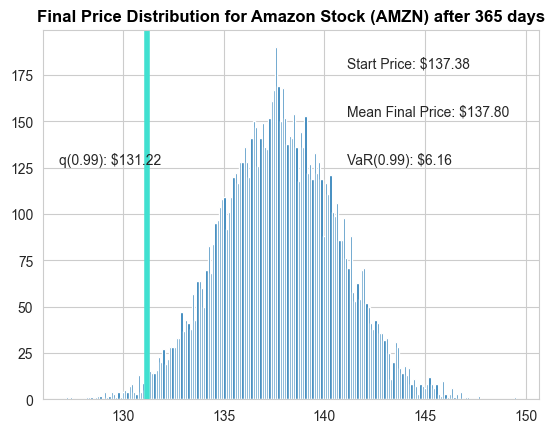

In [165]:
# Define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='Turquoise')

# For plot title
plt.title(label="Final Price Distribution for Amazon Stock (AMZN) after %s days" % days, weight='bold', color='black')

Based on the Monte Carlo Simulation, after 1 year, the mean final price for AMZN stock based on the given data will be $137.80. Additionally, there is 99% confidence that the stock price will not fall below $131.22, with a VaR (potential loss) of $6.16. 

## Apple

In [166]:
# Start Apple Stock Price
start_price = 177.24

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final Price Distribution for Apple Stock (AAPL) after 365 days')

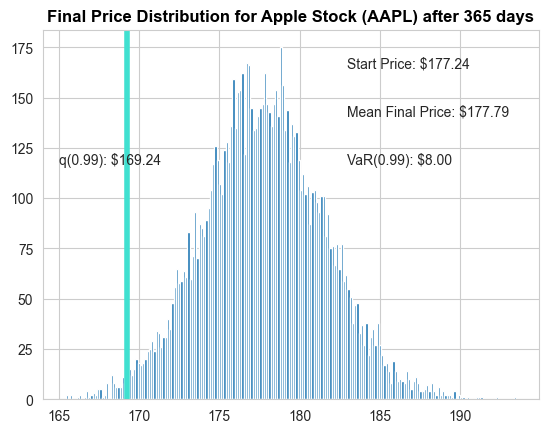

In [167]:
# Define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='Turquoise')

# For plot title
plt.title(label="Final Price Distribution for Apple Stock (AAPL) after %s days" % days, weight='bold', color='black')

Based on the Monte Carlo Simulation, after 1 year, the mean final price for AAPL stock based on the given data will be $177.79. Additionally, there is 99% confidence that the stock price will not fall below $169.24, with a VaR (potential loss) of $8.00. 

## Microsoft

In [168]:
# Start Microsoft Stock Price
start_price = 312.14

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final Price Distribution for Microsoft (MSFT) after 365 days')

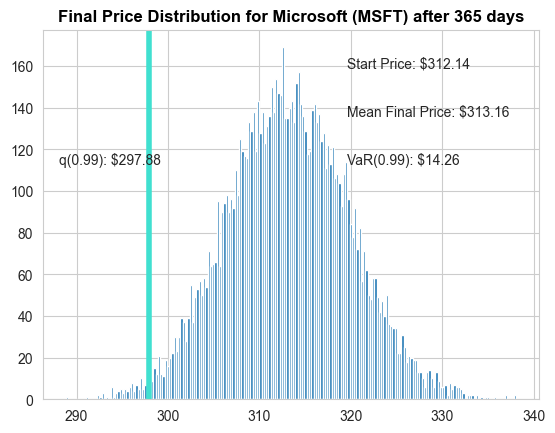

In [169]:
# Define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='Turquoise')

# For plot title
plt.title(label="Final Price Distribution for Microsoft (MSFT) after %s days" % days, weight='bold', color='black')

Based on the Monte Carlo Simulation, after 1 year, the mean final price for MSFT stock based on the given data will be $313.16. Additionally, there is 99% confidence that the stock price will not fall below $297.88, with a VaR (potential loss) of $11.98. 

## Tesla

In [170]:
# Start Tesla Stock Price
start_price = 239.09

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final Price Distribution for Tesla (TSLA) after 365 days')

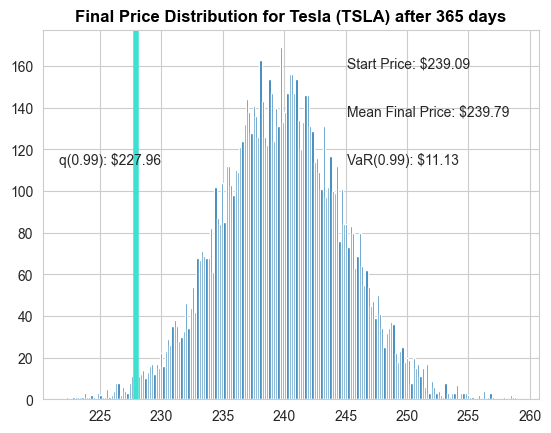

In [171]:
# Define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='Turquoise')

# For plot title
plt.title(label="Final Price Distribution for Tesla (TSLA) after %s days" % days, weight='bold', color='black')

Based on the Monte Carlo Simulation, after 1 year, the mean final price for TSLA stock based on the given data will be $239.79. Additionally, there is 99% confidence that the stock price will not fall below $227.96, with a VaR (potential loss) of $11.13. 

## Meta

In [172]:
# Start Meta Stock Price
start_price = 300.38

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final Price Distribution for Meta (META) after 365 days')

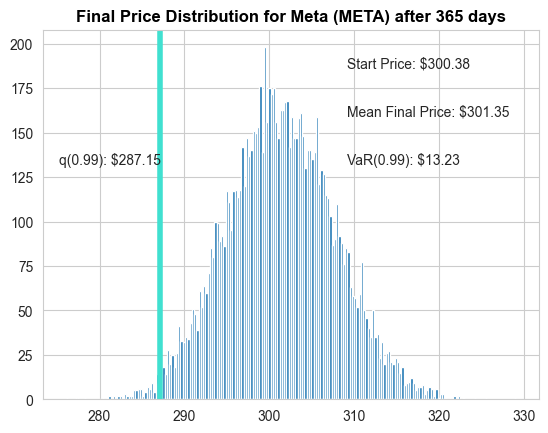

In [173]:
# Define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# Mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='Turquoise')

# For plot title
plt.title(label="Final Price Distribution for Meta (META) after %s days" % days, weight='bold', color='black')

Based on the Monte Carlo Simulation, after 1 year, the mean final price for META stock based on the given data will be $301.35. Additionally, there is 99% confidence that the stock price will not fall below $287.25, with a VaR (potential loss) of $13.23. 